In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [3]:
# Load the dataset
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
# Display basic info
print("Movies Dataset Info:\n")
print(movies.info())
print("\nCredits Dataset Info:\n")
print(credits.info())

Movies Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15 

In [5]:
# Display first few rows
print("\nMovies Dataset Sample:\n")
print(movies.head())
print("\nCredits Dataset Sample:\n")
print(credits.head())


Movies Dataset Sample:

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                e

In [6]:
# Check for missing values
print("\nMissing Values in Movies Dataset:\n")
print(movies.isnull().sum())
print("\nMissing Values in Credits Dataset:\n")
print(credits.isnull().sum())


Missing Values in Movies Dataset:

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Missing Values in Credits Dataset:

movie_id    0
title       0
cast        0
crew        0
dtype: int64


In [7]:
# Basic statistics
print("\nMovies Dataset Statistics:\n")
print(movies.describe())


Movies Dataset Statistics:

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800

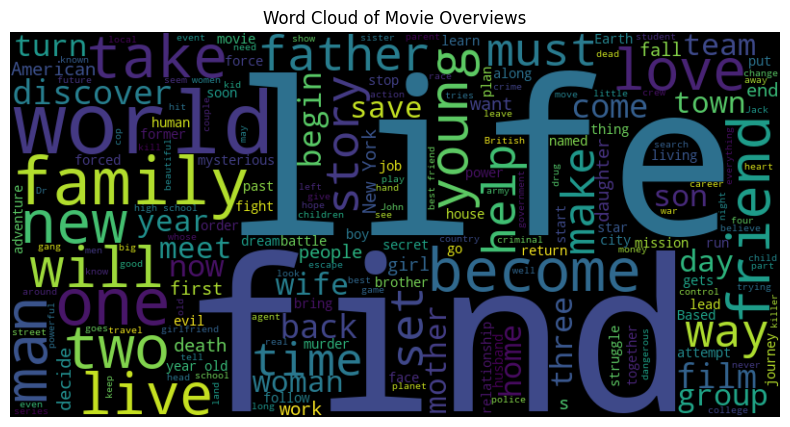

In [8]:
# Generate WordCloud from overviews
overview_text = " ".join(movies['overview'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(overview_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Overviews")
plt.show()

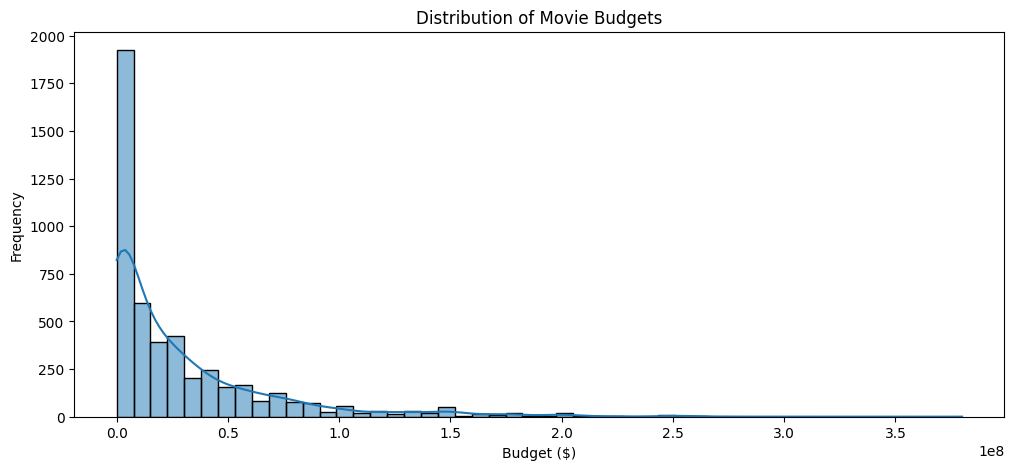

In [9]:
# Distribution of movie budgets and revenues
plt.figure(figsize=(12, 5))
sns.histplot(movies['budget'], bins=50, kde=True)
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget ($)")
plt.ylabel("Frequency")
plt.show()

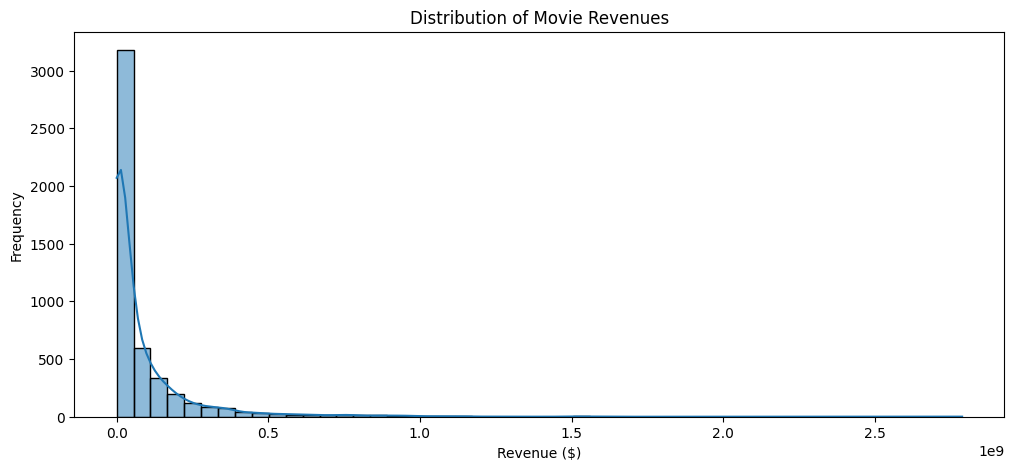

In [10]:
plt.figure(figsize=(12, 5))
sns.histplot(movies['revenue'], bins=50, kde=True)
plt.title("Distribution of Movie Revenues")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_58792\602448567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['revenue'], y=top_movies['title'], palette="viridis")


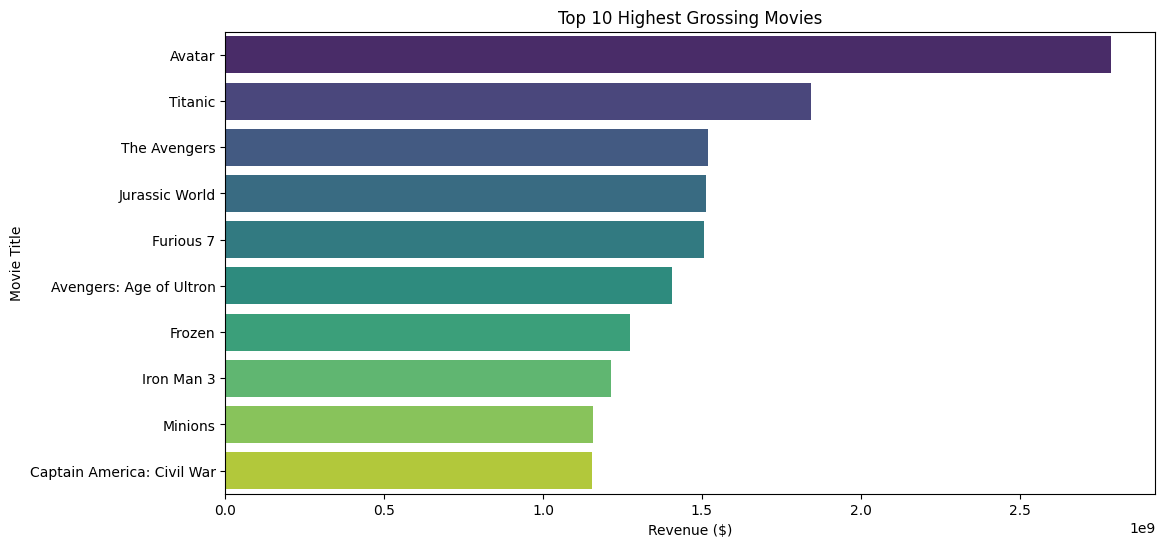

In [11]:
# Top 10 movies by revenue
top_movies = movies.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies['revenue'], y=top_movies['title'], palette="viridis")
plt.title("Top 10 Highest Grossing Movies")
plt.xlabel("Revenue ($)")
plt.ylabel("Movie Title")
plt.show()

In [12]:
# Merge datasets
df = movies.merge(credits, left_on='id', right_on='movie_id', how='inner')
df.drop(columns=['movie_id'], inplace=True)

In [ ]:
# Feature Exploration
def extract_features(feature_str):
    try:
        if pd.isna(feature_str) or feature_str == '':
            return []
        features = ast.literal_eval(feature_str)
        return [feature['name'] for feature in features]
    except:
        return []

df['genres_list'] = df['genres'].apply(extract_features)
df['keywords_list'] = df['keywords'].apply(extract_features)
df['top_cast'] = df['cast'].apply(lambda x: extract_features(x)[:3])
df['top_crew'] = df['crew'].apply(lambda x: extract_features(x)[:3])

print("\nExtracted Features Sample:\n")
print(df[['title_x', 'genres_list', 'keywords_list', 'top_cast', 'top_crew']].head())


Extracted Features Sample:

                                    title_x  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                     genres_list  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                       keywords_list  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                      

C:\Users\shrey\AppData\Local\Temp\ipykernel_58792\3905416368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies['popularity'], y=popular_movies['title_x'], palette="Blues_r")


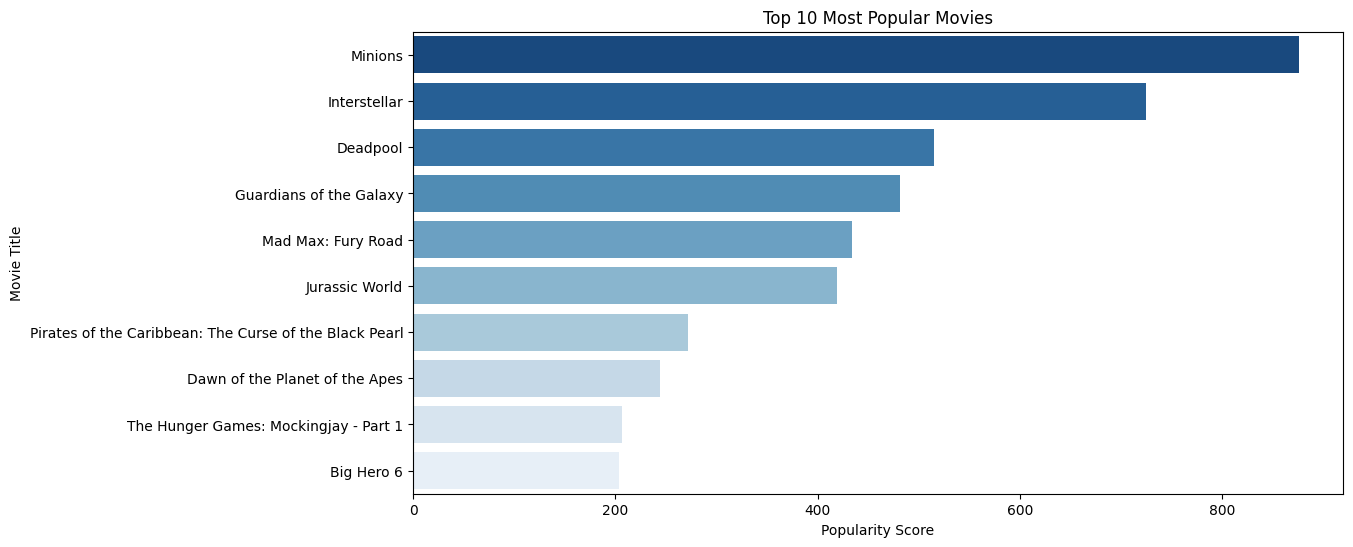

In [14]:
popular_movies = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_movies['popularity'], y=popular_movies['title_x'], palette="Blues_r")
plt.title("Top 10 Most Popular Movies")
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.show()

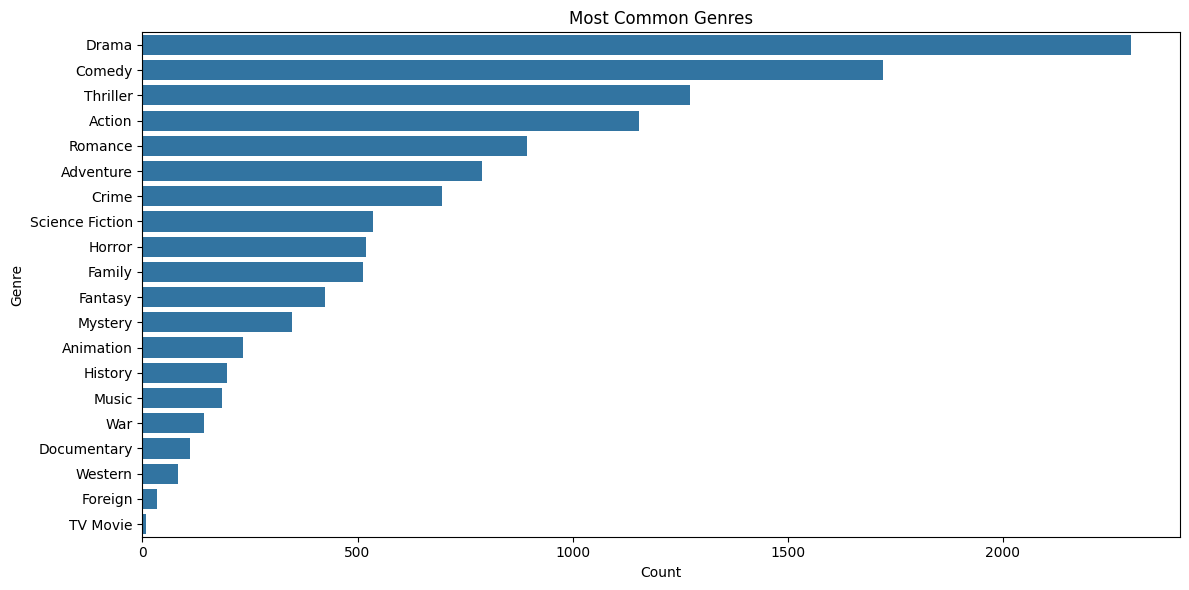

In [15]:
# Extract genre list
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(extract_genres)
genre_exploded = movies.explode('genre_list').reset_index(drop=True)

# Plot genre frequency
plt.figure(figsize=(12,6))
sns.countplot(data=genre_exploded, y='genre_list', order=genre_exploded['genre_list'].value_counts().index)
plt.title("Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [16]:
# Minimum budget threshold
min_budget = 10000000  # adjust based on your dataset units

# Filter and compute ROI
roi_df = movies[(movies['budget'] >= min_budget) & (movies['revenue'] > 0)].copy()
roi_df['ROI'] = roi_df['revenue'] / roi_df['budget']

# Round ROI for display
roi_df['ROI'] = roi_df['ROI'].round(2)

# Get Top 5
top_roi = roi_df.sort_values(by='ROI', ascending=False).head(5)
top_roi_display = top_roi[['title', 'budget', 'revenue', 'ROI']].copy()
top_roi_display.rename(columns={
    'title': 'Title',
    'budget': 'Budget',
    'revenue': 'Revenue',
    'ROI': 'ROI (×)'
}, inplace=True)

# Get Bottom 5
bottom_roi = roi_df.sort_values(by='ROI', ascending=True).head(5)
bottom_roi_display = bottom_roi[['title', 'budget', 'revenue', 'ROI']].copy()
bottom_roi_display.rename(columns={
    'title': 'Title',
    'budget': 'Budget',
    'revenue': 'Revenue',
    'ROI': 'ROI (×)'
}, inplace=True)

# Display both with styles
print("Top 5 Movies with Highest ROI (Budget ≥ 50):")
display(top_roi_display.style.hide(axis='index').format({
    "Budget": "${:,.0f}",
    "Revenue": "${:,.0f}",
    "ROI (×)": "{:.2f}"
}).set_caption("Top 5 ROI"))

print("Bottom 5 Movies with Lowest ROI (Budget ≥ 50):")
display(bottom_roi_display.style.hide(axis='index').format({
    "Budget": "${:,.0f}",
    "Revenue": "${:,.0f}",
    "ROI (×)": "{:.2f}"
}).set_caption("Bottom 5 ROI"))

Top 5 Movies with Highest ROI (Budget ≥ 50):


Title,Budget,Revenue,ROI (×)
E.T. the Extra-Terrestrial,"$10,500,000","$792,910,554",75.52
Star Wars,"$11,000,000","$775,398,007",70.49
Pretty Woman,"$14,000,000","$463,000,000",33.07
The Empire Strikes Back,"$18,000,000","$538,400,000",29.91
The King's Speech,"$15,000,000","$414,211,549",27.61


Bottom 5 Movies with Lowest ROI (Budget ≥ 50):


Title,Budget,Revenue,ROI (×)
Janky Promoters,"$10,000,000","$9,069",0.00
Strangerland,"$10,000,000","$17,472",0.00
5 Days of War,"$20,000,000","$17,479",0.00
1911,"$30,000,000","$108,348",0.00
Foodfight!,"$65,000,000","$73,706",0.00


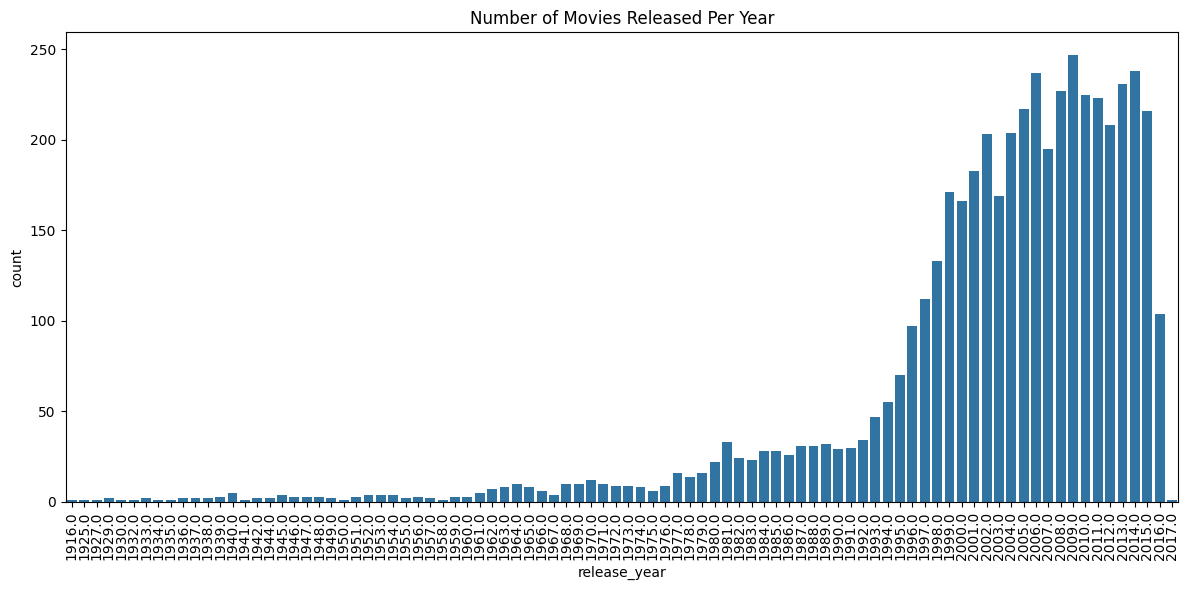

In [17]:
# Convert and extract year from release_date
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

# Plot release year trends
plt.figure(figsize=(12,6))
sns.countplot(data=movies, x='release_year', order=movies['release_year'].value_counts().sort_index().index)
plt.title("Number of Movies Released Per Year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

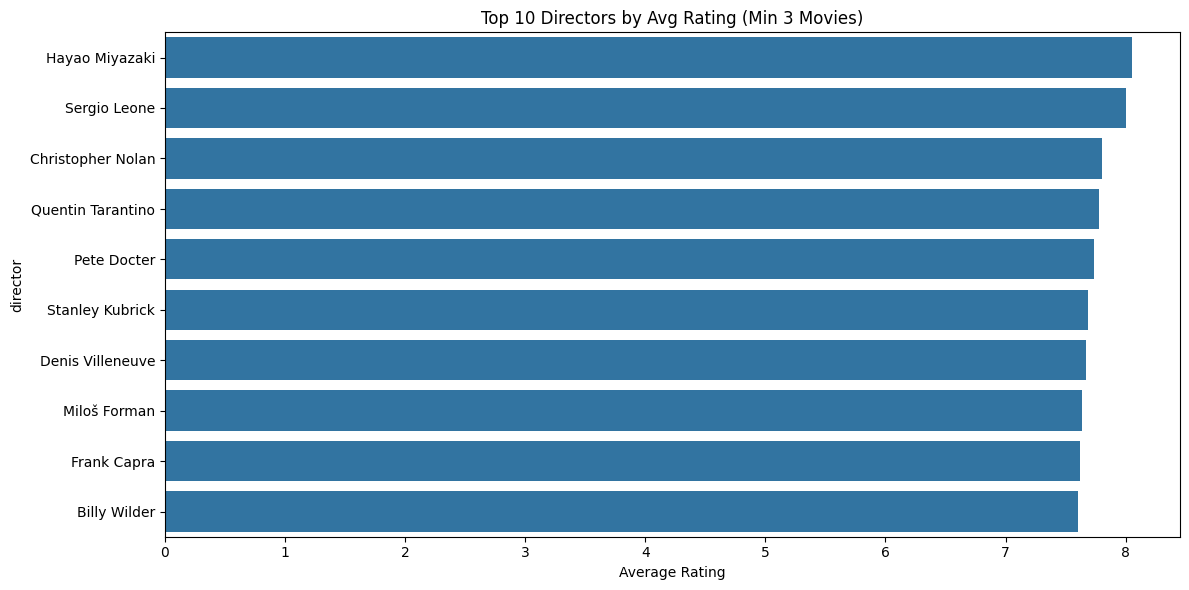

In [18]:
# Only parse 'crew' if needed
if isinstance(credits['crew'].iloc[0], str):
    credits['crew'] = credits['crew'].apply(ast.literal_eval)

# Extract director
def extract_director(crew):
    if isinstance(crew, list):
        for member in crew:
            if member.get('job') == 'Director':
                return member.get('name')
    return None

credits['director'] = credits['crew'].apply(extract_director)

# Merge datasets
merged = movies.merge(credits[['movie_id', 'director']], left_on='id', right_on='movie_id', how='left')

# Group by director: filter out those with < 3 movies
director_stats = merged.groupby('director').agg({
    'vote_average': ['mean', 'count'],
    'vote_count': 'sum'
})
director_stats.columns = ['avg_rating', 'movie_count', 'total_votes']
director_stats = director_stats[director_stats['movie_count'] >= 3]

# Sort by average rating + optionally by total votes for relevance
top_directors = director_stats.sort_values(by=['avg_rating', 'total_votes'], ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors['avg_rating'], y=top_directors.index)
plt.title("Top 10 Directors by Avg Rating (Min 3 Movies)")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()

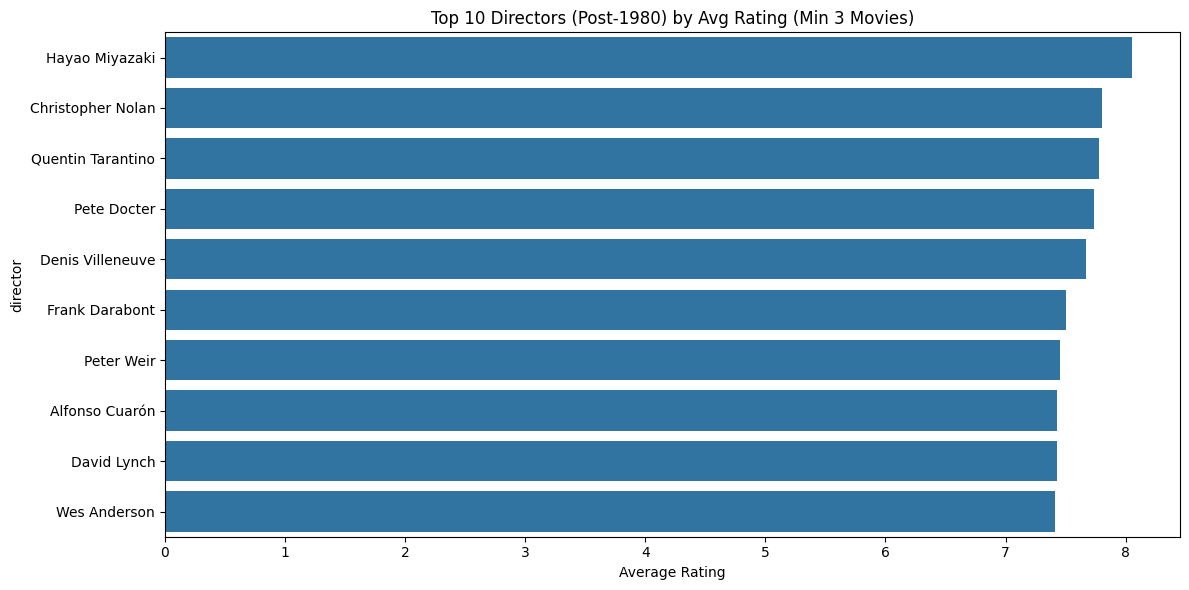

In [19]:
# Parse crew if needed
if isinstance(credits['crew'].iloc[0], str):
    credits['crew'] = credits['crew'].apply(ast.literal_eval)

# Extract director
def extract_director(crew):
    if isinstance(crew, list):
        for member in crew:
            if member.get('job') == 'Director':
                return member.get('name')
    return None

credits['director'] = credits['crew'].apply(extract_director)

# Merge with movies
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
merged = movies.merge(credits[['movie_id', 'director']], left_on='id', right_on='movie_id', how='left')

# Filter: movies released after 1980
modern_movies = merged[merged['release_date'].dt.year >= 1980]

# Group by director and calculate stats
director_stats = modern_movies.groupby('director').agg({
    'vote_average': ['mean', 'count'],
    'vote_count': 'sum'
})
director_stats.columns = ['avg_rating', 'movie_count', 'total_votes']

# Filter directors with at least 3 movies
director_stats = director_stats[director_stats['movie_count'] >= 3]

# Sort by avg_rating, break ties with vote count
top_directors = director_stats.sort_values(by=['avg_rating', 'total_votes'], ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors['avg_rating'], y=top_directors.index)
plt.title("Top 10 Directors (Post-1980) by Avg Rating (Min 3 Movies)")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()

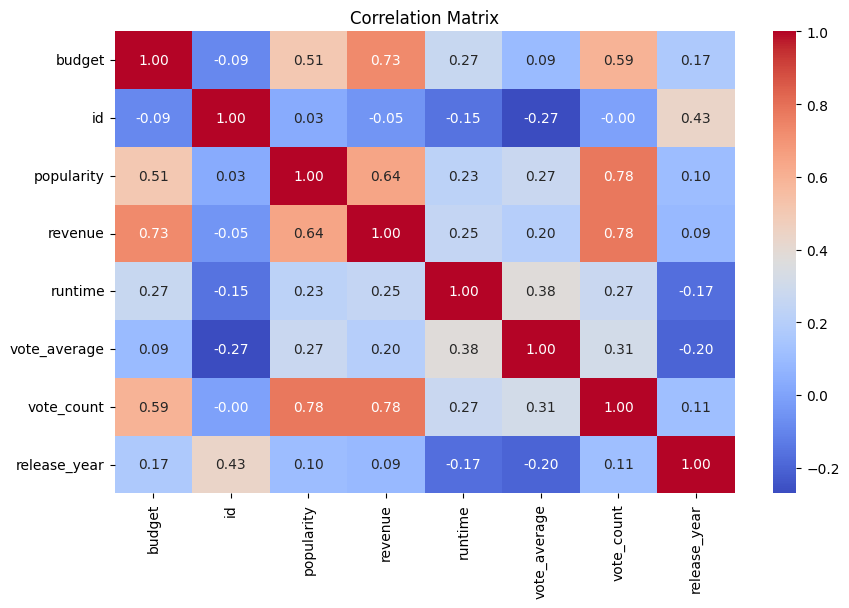

In [20]:
plt.figure(figsize=(10, 6))
numeric_movies = movies.select_dtypes(include=['number'])
corr_matrix = numeric_movies.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()